In [54]:
import pandas as pd
import numpy as np
import numpy.matlib
import scipy
from matplotlib import pyplot as plt

N = 43886
kiber = pd.read_csv('Kibergrad.csv')

# točki a in b
vzorec = pd.DataFrame(kiber.sample(n = 200))

p_bar = len(vzorec[vzorec.IZOBRAZBA <= 38]) / 200
print('Ocena za delež družin, v katerih vodja gospodinjstva nima srednješolske izobrazbe je ' + str(p_bar))

print('Ocenimo še standardno napako:')
se_bar = ((p_bar * (1 - p_bar) / 199) * (N - 200) / N) ** 0.5
print('Nepristranska točkovna ocena za standardno napako stopnje izobrazbe je ' + str(se_bar))
c = se_bar * 1.98 # vzel kvantil pri 120 prostostnih stopnjah kot dober približek za 199 prostostnih stopenj
print('S pomočjo te ocene nato dobimo še 95 odstoten interval zaupanja [' + str(p_bar - c) + ', ' + str(p_bar + c) + '].')

Ocena za delež družin, v katerih vodja gospodinjstva nima srednješolske izobrazbe je 0.205
Ocenimo še standardno napako:
Nepristranska točkovna ocena za standardno napako stopnje izobrazbe je 0.028552365735181714
S pomočjo te ocene nato dobimo še 95 odstoten interval zaupanja [0.1484663158443402, 0.2615336841556598].


In [55]:
# točka c
p = len(kiber[kiber.IZOBRAZBA <= 38]) / N
print('Populacijski delež gospodinjstev, v katerih vodja gospodinjstva nima srednješolske izobrazbe je: ' + str(p))
if p >= p_bar - c and p <= p_bar + c: # priprava na točko d
    stevec = 1
else:
    stevec = 0
se = (((p * (1 - p)) / 200) * (N - 200) / (N-1)) ** 0.5
print('Prava standardna napaka je: ' + str(se))

Populacijski delež gospodinjstev, v katerih vodja gospodinjstva nima srednješolske izobrazbe je: 0.21150252928040833
Prava standardna napaka je: 0.028810847022556974


AttributeError: module 'numpy' has no attribute 'matrix'

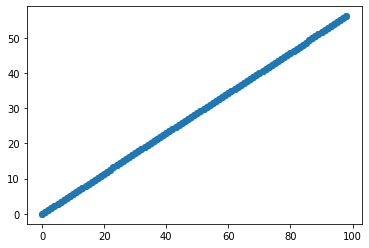

In [ ]:
a = []
b = []
c = []

for x in range(99):
    a.append(x)
    b.append(x*0.5723123)
    c.append(1.67)

plt.scatter(a,b)
plt.errorbar(a, b, yerr=c, fmt="o")
plt.show()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100] [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

AttributeError: module 'numpy' has no attribute 'matrix'

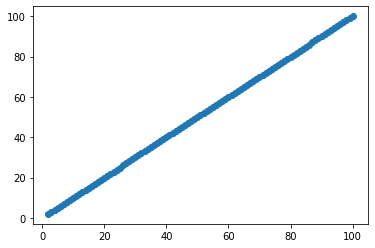

In [62]:
# točki d in e za vzorce velikosti 200
a = []
b = []
er = []

odkloni_list = []
odkloni_list.append((p_bar * (1 - p_bar)) ** 0.5)
for x in range(99):
    vzorec = pd.DataFrame(kiber.sample(n = 200))
    p_bar = len(vzorec[vzorec.IZOBRAZBA <= 38]) / 200
    se_bar = ((p_bar * (1 - p_bar) / 199) * (N - 200) / N) ** 0.5
    c = se_bar * 1.98
    if p >= p_bar - c and p <= p_bar + c:
        stevec = stevec + 1

    a.append(x + 2)
    b.append(x + 2)
    er.append(1)
    odkloni_list.append((p_bar * (1 - p_bar)) ** 0.5) # odklone izračunamo in za dan vzorec in ne ocenjujemo pravega

print('Število intervalov, ki pokrije populacijski delež je '+ str(stevec))
plt.scatter(a,b)

plt.errorbar(a, b, yerr=er)
plt.show()

odkloni = pd.DataFrame(odkloni_list, columns=['Odkloni'], dtype=float)
print('Poglejmo še standardno napako pri vzorcu velikosti 200. Ta je enaka ' + str( ((N-200) / ((N-1)*200)) ** 0.5 * se))
odkloni

In [115]:
# točki e in d še za 100 vzorcev velikosti 800
stevec2 = 0
odkloni_list2 = []
for x in range(100):
    vzorec = pd.DataFrame(kiber.sample(n = 800))
    p_bar = len(vzorec[vzorec.IZOBRAZBA <= 38]) / 800
    se_bar = ((p_bar * (1 - p_bar) / 800) * (N - 800) / (N - 1)) ** 0.5
    c = se_bar * 1.98 # morda lahko vzamem tudi 1.97 vendar je razlika zanemarljiva
    if p >= p_bar - c and p <= p_bar + c:
        stevec2 = stevec2 + 1

    odkloni_list.append((p_bar * (1 - p_bar)) ** 0.5) # odklone izračunamo in za dan vzorec in ne ocenjujemo pravega

print('Število intervalov, ki pokrije populacijski delež je '+ str(stevec2))

odkloni2 = pd.DataFrame(odkloni_list2, columns=['Odkloni'], dtype=float)
print('Poglejmo še standardno napako pri vzorcu velikosti 200. Ta je enaka ' + str( ((N-800) / ((N-1)*800)) ** 0.5 * se))
odkloni

Število intervalov, ki pokrije populacijski delež je 93
Poglejmo še standardno napako pri vzorcu velikosti 200. Ta je enaka 0.014306156731284972


,Odkloni
0,0.430087
1,0.357071
2,0.379967
3,0.414246
4,0.388298
...,...
95,0.410822
96,0.433013
97,0.435861
98,0.433013
